In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
'''
Read data, the first 4 columns in these files correspond to:
    - exp: number of experiment
    - pos: position fixed in the microscope to take pictures over time
    - mother: mother cell of the cell measured
    - cell: cell number, the numbering starts over in each position (not unique)
    
These four columns have to be used as an index to identify each cell
'''
num_timepoints=219
data=pd.read_table("WT.csv",sep=",",names=["exp","pos","mother","cell"]+list(range(num_timepoints)))
data.set_index(["exp","pos","mother","cell"],inplace=True)

mut1=pd.read_table("Mutant1.csv",sep=",",names=["exp","pos","mother","cell"]+list(range(num_timepoints)))
mut1.set_index(["exp","pos","mother","cell"],inplace=True)

mut2=pd.read_table("Mutant2.csv",sep=",",names=["exp","pos","mother","cell"]+list(range(num_timepoints)))
mut2.set_index(["exp","pos","mother","cell"],inplace=True)

In [3]:
#Visualize data before melting
data.head()

0       1       2       3       4       5       6    \
exp pos mother cell                                                             
2   1   1      601.20  618.96  623.26  610.63  617.80  615.34  614.37  612.04   
        2      608.03  619.02  626.65  618.83  631.28  631.23  627.68  622.99   
        3      606.99  616.77  621.32  617.06  622.71  623.96  620.66  616.02   
        4      616.08  635.82  635.78  622.98  627.57  627.55  621.06  624.96   
        6      611.92  625.76  628.01  617.51  627.49  628.28  627.32  623.45   

                          7       8       9    ...      209      210      211  \
exp pos mother cell                            ...                              
2   1   1      601.20  610.79  609.19  614.79  ...  1191.00  1201.30  1193.20   
        2      608.03  624.40  622.22  622.55  ...   849.06   844.88   826.96   
        3      606.99  614.82  615.41  614.46  ...  4875.40  4755.30  4743.60   
        4      616.08  627.14  623.71  622.94  ...  5925.00  6106.20  5812.90   
        6      611.92  621.63  621.81  622.14  ...  1378.30  1404.60  1365.30   

                           212      213     214      215      216      217  \
exp pos mother cell                                                          
2   1   1      601.20  1192.70  1181.20  1178.4  1191.00  1195.20  1189.00   
        2      608.03   830.27   820.06   816.3   810.44   834.11   830.89   
        3      606.99  4619.00  4581.10  4494.9  4540.80  4645.50  4434.70   
        4      616.08  5795.70  5545.80  5331.1  5360.10  5520.70  5674.80   
        6      611.92  1357.30  1351.60  1312.9  1235.50  1265.60  1267.80   

                           218  
exp pos mother cell             
2   1   1      601.20  1154.10  
        2      608.03   834.44  
        3      606.99  4317.20  
        4      616.08  5693.80  
        6      611.92  1241.10  

[5 rows x 219 columns]

In [4]:
#Add strain name
data4plot=data.melt()
data4plot["strain"]="WT"

mut14plot=mut1.melt()
mut14plot["strain"]="Mutant 1"

mut24plot=mut2.melt()
mut24plot["strain"]="Mutant 2"
mut24plot.head()

,variable,value,strain
0,0,592.36,Mutant 2
1,0,609.06,Mutant 2
2,0,591.18,Mutant 2
3,0,618.66,Mutant 2
4,0,640.60,Mutant 2


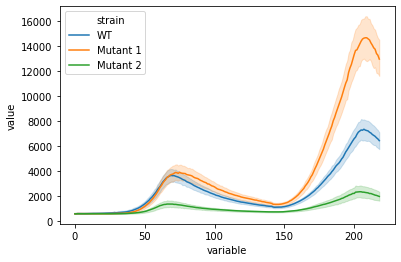

In [5]:
#Join all strains and plot
allstrains=pd.concat([data4plot,mut14plot,mut24plot])
sns.lineplot(data=allstrains,x="variable",y="value",hue="strain")